## Resources
#### Scipy 2010
https://mentat.za.net/numpy/kittens/kittens_dragons_scipy2010.pdf

In [ ]:
b

In [4]:
gene0 = [100, 200, 50, 400]
gene1 = [50, 0, 0, 100]
gene2 = [350, 100, 50, 200]
expression_data = [gene0, gene1, gene2]

In [5]:
expression_data

[[100, 200, 50, 400], [50, 0, 0, 100], [350, 100, 50, 200]]

In [2]:
import numpy as np

In [6]:
a = np.array(expression_data)

In [7]:
a

array([[100, 200,  50, 400],
       [ 50,   0,   0, 100],
       [350, 100,  50, 200]])

In [8]:
def print_info(a):
    print('number of elements:', a.size)
    print('number of dimensions:', a.ndim)
    print('shape:', a.shape)
    print('data type:', a.dtype)
    print('strides:', a.strides)
    print('flags:')
    print(a.flags)
    
print_info(a)

number of elements: 12
number of dimensions: 2
shape: (3, 4)
data type: int64
strides: (32, 8)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False


In [9]:
a.data

In [10]:
abytes = a.ravel().view(dtype=np.uint8)


In [11]:
print_info(abytes)

number of elements: 96
number of dimensions: 1
shape: (96,)
data type: uint8
strides: (1,)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False


In [12]:
print(abytes[:24])

[100   0   0   0   0   0   0   0 200   0   0   0   0   0   0   0  50   0
   0   0   0   0   0   0]


In [13]:
abytes[1]=1
#Binary 256

In [14]:
a.ravel()[0]

356

### Example: take the transpose of a

In [15]:
print_info(a.T)

number of elements: 12
number of dimensions: 2
shape: (4, 3)
data type: int64
strides: (8, 32)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False


### Example: skipping rows and columns with slicing

In [16]:
print_info(a.T[::2])

number of elements: 6
number of dimensions: 2
shape: (2, 3)
data type: int64
strides: (16, 32)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False


### Getting a copy

In [17]:
expr = np.load('expr.npy')

In [18]:
print_info(expr)

number of elements: 7687500
number of dimensions: 2
shape: (20500, 375)
data type: uint32
strides: (4, 82000)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False


In [19]:
print(f'{expr.size:,}')

7,687,500


In [20]:
import dis

In [21]:
a.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [22]:
np.sum(expr,axis=0).size

375

In [23]:
r=np.random.random((10,3))

### Excercise
Generate a 10 x 3 array of random numbers. From each row, pick the column containing the number closest to 0.75.
Hint: use of np.abs and np.argmin to find the column j that contains the closest element in each row i. The final result should be a vector of integers of shape (10,).

In [24]:
np.abs(r-0.75)

array([[0.59046753, 0.36267124, 0.59896331],
       [0.04129267, 0.05103257, 0.56236077],
       [0.50514872, 0.69317123, 0.58165705],
       [0.18630736, 0.24760993, 0.32647497],
       [0.02708936, 0.21418624, 0.56392506],
       [0.19314655, 0.11242941, 0.68582636],
       [0.32424131, 0.25530696, 0.05277815],
       [0.70120199, 0.14965028, 0.1190253 ],
       [0.10077442, 0.10225322, 0.22131991],
       [0.01110697, 0.18382773, 0.60871699]])

In [25]:
np.abs(r-0.75).argmin(axis=1)

array([1, 0, 0, 0, 0, 1, 2, 2, 0, 0])


### Exercise
<br>
Some applications, such as clustering, are computationally expensive, and wouldn't work without first doing some form of feature selection, where we discard most of the data and keep only what we think will be most useful. One simple version is to keep only the genes with the most variance (as these will be more informative than genes that don't vary between patients).
Find the variance across patients of all the genes (rows) in the expression dataset.
Use np.argsort to find the location of the 1,500 most variable genes.
Use these indices to produce a shape (1500, 375) matrix containing only the most variable genes.

In [26]:
var_rows = np.var(expr,axis=1).argsort()[-1500:]

In [27]:
expr[var_rows].shape

(1500, 375)

In [28]:
type(var_rows)

numpy.ndarray

### Advanced operations: broadcasting
In order to normalize every column by its corresponding library size, we have to align the two arrays' axes: each dimension must be either the same size, or one of the arrays must have size 1. Use np.newaxis to match the dimensions. But let's first do some simple examples:

In [29]:
a+3

array([[359, 203,  53, 403],
       [ 53,   3,   3, 103],
       [353, 103,  53, 203]])

In [30]:
b = np.array([1, 2, 3, 4])
a + b  # broadcasting: coerce arrays to same shape by repeating as needed

array([[357, 202,  53, 404],
       [ 51,   2,   3, 104],
       [351, 102,  53, 204]])

In [31]:
b = np.array([1, 2, 3])
a + b  # broadcasting: not just magic!

ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [32]:
np.array([[1],[2],[3]]).shape

(3, 1)

In [33]:
b = np.array([[1], [2], [3]])
a + b  # broadcasting: shape compatibility

array([[357, 201,  51, 401],
       [ 52,   2,   2, 102],
       [353, 103,  53, 203]])

In [34]:
lib_size=np.sum(expr,axis=0)

In [35]:
print(expr.shape)
print(lib_size.shape)
print(lib_size[np.newaxis,:].shape)

(20500, 375)
(375,)
(1, 375)


Let's check if we can divide each of the new arrays

In [36]:
np.all([True,False,True])

False

In [37]:
np.all([True,True,True])

True

In [38]:
np.all(expr/lib_size == expr/lib_size[np.newaxis,:])

True

In [39]:
expr_lib = expr / lib_size

We also multiply by $10^6$ in order to keep the numbers on a readable scale (reads per million reads).

In [40]:
expr_lib *= 1e6

In [41]:
gene_len = np.load('gene-lens.npy')
print(gene_len.shape)

(20500,)


Exercise: broadcast expr_lib and gene_len together to produce RPKM
Reminder:<br>
$RPKM = \frac{C}{N \times 10^{-6} \times L \times 10^{-3}} = \frac{10^9C}{NL}$
<br>where $C$ is the raw counts, $N$ is the library size (in reads) and $L$ is the gene length (in bases).

In [42]:
rpkm = expr_lib/gene_len[:,np.newaxis]*1e3

In [43]:
rpkm.shape

(20500, 375)

In [44]:
from matplotlib import pyplot as plt
from scipy import stats

def plot_col_density(data, xlim=None, *args, **kwargs):
    # Use gaussian smoothing to estimate the density
    density_per_col = [stats.kde.gaussian_kde(col) for col in data.T]
    if xlim is not None:
        m, M = xlim
    else:
        m, M = np.min(data), np.max(data)
    x = np.linspace(m, M, 100)

    fig, ax = plt.subplots()
    for density in density_per_col:
        ax.plot(x, density(x), *args, **kwargs)
    ax.set_xlabel('log-counts')
    ax.set_ylabel('frequency')
    if xlim is not None:
        ax.set_xlim(xlim)
    plt.show()

In [45]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

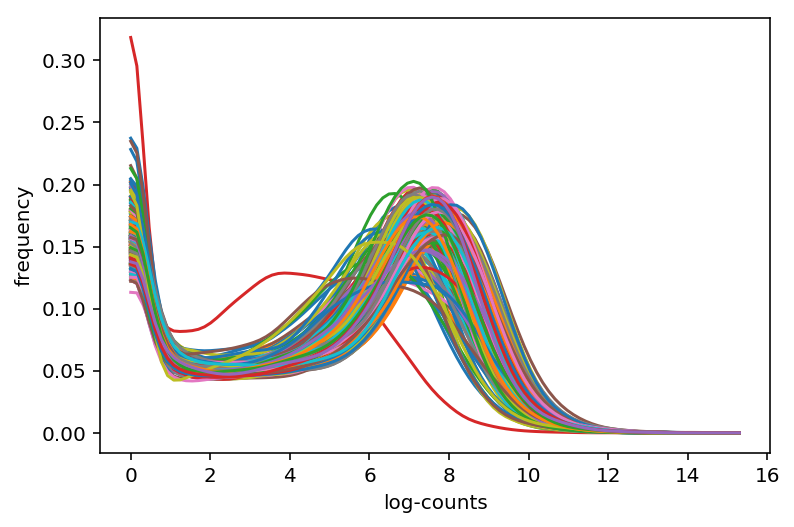

In [46]:
plot_col_density(np.log(expr+1))

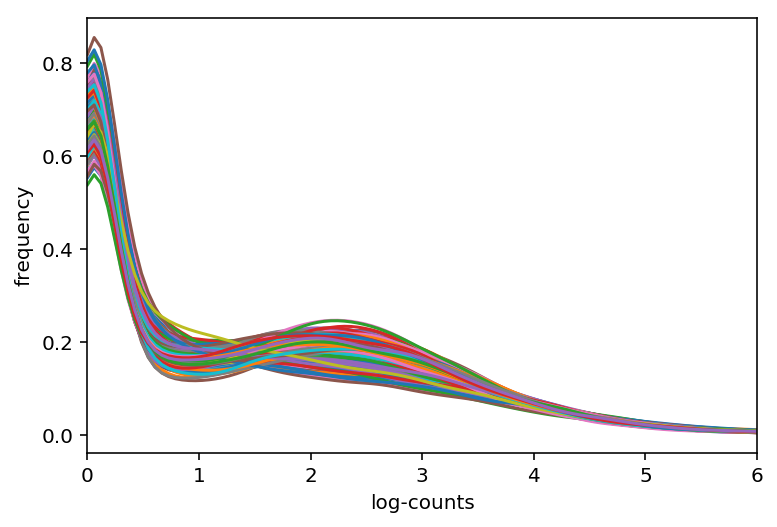

In [47]:
plot_col_density(np.log(rpkm + 1), xlim=(0, 6))

### Exercise: 3D broadcasting
Below, using broadcasting, produce the array containing the sum of every element in x with every element in y. That is, produce an array z such that z[i, j, k] contains either the sum of x[i] and y[j, k] OR the sum of y[i, j] and x[k].

In [82]:
x = np.random.random(size=(3, 5))
y = np.random.randint(10, size=8)


In [83]:
x,y

(array([[0.39437105, 0.53186091, 0.38174572, 0.84203705, 0.85831532],
        [0.51302119, 0.24246024, 0.54225864, 0.634803  , 0.37494689],
        [0.31745199, 0.05650362, 0.31825733, 0.13093765, 0.25126052]]),
 array([5, 9, 0, 4, 6, 9, 7, 3]))

In [96]:
x=np.array([[1,1,1,1,1],[2,2,2,2,2],[3,3,3,3,3]])
y=np.array([100,200,300,400,500,600,700,800])

In [97]:
x,y

(array([[1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3]]), array([100, 200, 300, 400, 500, 600, 700, 800]))

In [98]:
x.shape

(3, 5)

In [99]:
y.shape

(8,)

In [100]:
x+y

ValueError: operands could not be broadcast together with shapes (3,5) (8,) 

In [113]:
y[:,np.newaxis,np.newaxis]

array([[[100]],

       [[200]],

       [[300]],

       [[400]],

       [[500]],

       [[600]],

       [[700]],

       [[800]]])

In [101]:
(x+y[:,np.newaxis,np.newaxis]).shape

(8, 3, 5)

In [102]:
x+y[:,np.newaxis,np.newaxis]

array([[[101, 101, 101, 101, 101],
        [102, 102, 102, 102, 102],
        [103, 103, 103, 103, 103]],

       [[201, 201, 201, 201, 201],
        [202, 202, 202, 202, 202],
        [203, 203, 203, 203, 203]],

       [[301, 301, 301, 301, 301],
        [302, 302, 302, 302, 302],
        [303, 303, 303, 303, 303]],

       [[401, 401, 401, 401, 401],
        [402, 402, 402, 402, 402],
        [403, 403, 403, 403, 403]],

       [[501, 501, 501, 501, 501],
        [502, 502, 502, 502, 502],
        [503, 503, 503, 503, 503]],

       [[601, 601, 601, 601, 601],
        [602, 602, 602, 602, 602],
        [603, 603, 603, 603, 603]],

       [[701, 701, 701, 701, 701],
        [702, 702, 702, 702, 702],
        [703, 703, 703, 703, 703]],

       [[801, 801, 801, 801, 801],
        [802, 802, 802, 802, 802],
        [803, 803, 803, 803, 803]]])

### OR

In [110]:
x

array([[1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3]])

In [109]:
x[...,np.newaxis]

array([[[1],
        [1],
        [1],
        [1],
        [1]],

       [[2],
        [2],
        [2],
        [2],
        [2]],

       [[3],
        [3],
        [3],
        [3],
        [3]]])

In [107]:
x[...,np.newaxis]+y

array([[[101, 201, 301, 401, 501, 601, 701, 801],
        [101, 201, 301, 401, 501, 601, 701, 801],
        [101, 201, 301, 401, 501, 601, 701, 801],
        [101, 201, 301, 401, 501, 601, 701, 801],
        [101, 201, 301, 401, 501, 601, 701, 801]],

       [[102, 202, 302, 402, 502, 602, 702, 802],
        [102, 202, 302, 402, 502, 602, 702, 802],
        [102, 202, 302, 402, 502, 602, 702, 802],
        [102, 202, 302, 402, 502, 602, 702, 802],
        [102, 202, 302, 402, 502, 602, 702, 802]],

       [[103, 203, 303, 403, 503, 603, 703, 803],
        [103, 203, 303, 403, 503, 603, 703, 803],
        [103, 203, 303, 403, 503, 603, 703, 803],
        [103, 203, 303, 403, 503, 603, 703, 803],
        [103, 203, 303, 403, 503, 603, 703, 803]]])

In [126]:
(x[...,np.newaxis]+y).shape

(3, 5, 8)

#### Another example

In [133]:
np.random.random(size=(2,2,2,3))+y[:3,np.newaxis,np.newaxis,np.newaxis,np.newaxis]

array([[[[[100.44890224, 100.90915191, 100.53999315],
          [100.76814006, 100.35126334, 100.53607869]],

         [[100.37463852, 100.25525819, 100.97524784],
          [100.12618245, 100.88153082, 100.79072526]]],


        [[[100.31411612, 100.43889518, 100.88943002],
          [100.36723204, 100.91919607, 100.28105855]],

         [[100.78887375, 100.85654203, 100.63247913],
          [100.80850656, 100.61845972, 100.43830314]]]],



       [[[[200.44890224, 200.90915191, 200.53999315],
          [200.76814006, 200.35126334, 200.53607869]],

         [[200.37463852, 200.25525819, 200.97524784],
          [200.12618245, 200.88153082, 200.79072526]]],


        [[[200.31411612, 200.43889518, 200.88943002],
          [200.36723204, 200.91919607, 200.28105855]],

         [[200.78887375, 200.85654203, 200.63247913],
          [200.80850656, 200.61845972, 200.43830314]]]],



       [[[[300.44890224, 300.90915191, 300.53999315],
          [300.76814006, 300.35126334, 300.53607869]],

In [137]:
x,y

(array([[1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3]]), array([100, 200, 300, 400, 500, 600, 700, 800]))

### Exercise: explicit broadcasting and stride tricks
Now, use np.broadcast_arrays to xbroad and ybroad that are the same shape as z (so that a simple element-wise addition will give z). Then use print_info on xbroad and ybroad. Notice anything weird?

In [140]:
xbroad,ybroad=np.broadcast_arrays(x[...,np.newaxis],y)

In [143]:
xbroad,ybroad

(array([[[1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1]],
 
        [[2, 2, 2, 2, 2, 2, 2, 2],
         [2, 2, 2, 2, 2, 2, 2, 2],
         [2, 2, 2, 2, 2, 2, 2, 2],
         [2, 2, 2, 2, 2, 2, 2, 2],
         [2, 2, 2, 2, 2, 2, 2, 2]],
 
        [[3, 3, 3, 3, 3, 3, 3, 3],
         [3, 3, 3, 3, 3, 3, 3, 3],
         [3, 3, 3, 3, 3, 3, 3, 3],
         [3, 3, 3, 3, 3, 3, 3, 3],
         [3, 3, 3, 3, 3, 3, 3, 3]]]),
 array([[[100, 200, 300, 400, 500, 600, 700, 800],
         [100, 200, 300, 400, 500, 600, 700, 800],
         [100, 200, 300, 400, 500, 600, 700, 800],
         [100, 200, 300, 400, 500, 600, 700, 800],
         [100, 200, 300, 400, 500, 600, 700, 800]],
 
        [[100, 200, 300, 400, 500, 600, 700, 800],
         [100, 200, 300, 400, 500, 600, 700, 800],
         [100, 200, 300, 400, 500, 600, 700, 800],
         [100, 200, 300, 400, 500, 600, 700, 800],
    

In [141]:
print_info(xbroad)

number of elements: 120
number of dimensions: 3
shape: (3, 5, 8)
data type: int64
strides: (40, 8, 0)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False


In [142]:
print_info(ybroad)

number of elements: 120
number of dimensions: 3
shape: (3, 5, 8)
data type: int64
strides: (0, 0, 8)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



### Stride tricks
By manipulating the shape and strides of an array, we can produce a "virtual" array much bigger than its memory usage:

In [145]:
def repeat(arr, n):
    return np.lib.stride_tricks.as_strided(arr,
                                           shape=(n,) + arr.shape,
                                           strides=(0,) + arr.strides)

In [173]:
row = np.random.random(size=5)
repeated_row = repeat(row, 4)
print(row)
print("*"*80)
print(repeated_row)

[0.85104435 0.420008   0.95955791 0.15457271 0.01511942]
********************************************************************************
[[0.85104435 0.420008   0.95955791 0.15457271 0.01511942]
 [0.85104435 0.420008   0.95955791 0.15457271 0.01511942]
 [0.85104435 0.420008   0.95955791 0.15457271 0.01511942]
 [0.85104435 0.420008   0.95955791 0.15457271 0.01511942]]


In [169]:
row.strides

(40, 8)

In [170]:
np.lib.stride_tricks.as_strided(row,shape=(4,)+row.shape,strides=(0,) + row.strides)

array([[[0.63633044, 0.49735104, 0.34869294, 0.7457385 , 0.62469902],
        [0.63571471, 0.90113486, 0.79274453, 0.56252204, 0.52505839]],

       [[0.63633044, 0.49735104, 0.34869294, 0.7457385 , 0.62469902],
        [0.63571471, 0.90113486, 0.79274453, 0.56252204, 0.52505839]],

       [[0.63633044, 0.49735104, 0.34869294, 0.7457385 , 0.62469902],
        [0.63571471, 0.90113486, 0.79274453, 0.56252204, 0.52505839]],

       [[0.63633044, 0.49735104, 0.34869294, 0.7457385 , 0.62469902],
        [0.63571471, 0.90113486, 0.79274453, 0.56252204, 0.52505839]]])

In [174]:

print_info(repeated_row)

number of elements: 20
number of dimensions: 2
shape: (4, 5)
data type: float64
strides: (0, 8)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False


### Exercise

In [164]:
x = np.random.random((3, 2)).astype(np.float32)

Try to answer these without looking at x. Then, try them out with the print_info function.
<br>What is the shape of x?
<br>What are the strides of x?
<br>Is x C-contiguous, F-contiguous, or neither?
<br>Now let y = repeat(x, 4). What is its shape? What are its strides? Is it contiguous?

In [165]:
print_info(x)

number of elements: 6
number of dimensions: 2
shape: (3, 2)
data type: float32
strides: (8, 4)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False


In [166]:
y = repeat(x, 4)

In [167]:
print_info(y)

number of elements: 24
number of dimensions: 3
shape: (4, 3, 2)
data type: float32
strides: (0, 8, 4)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False


In [175]:
x.__array_interface__

{'data': (140641662355584, False),
 'strides': None,
 'descr': [('', '<f4')],
 'typestr': '<f4',
 'shape': (3, 2),
 'version': 3}

In [179]:
x.dtype='int32'

In [180]:
x.dtype

dtype('int32')

**Another Exercise**

In [190]:
x = np.arange(20).reshape([4, 5])

In [191]:
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [183]:
x.strides

(40, 8)

In [193]:
x.dtype='int32'

In [194]:
np.lib.stride_tricks.as_strided(x, shape=(3, 2, 5),
                                strides=(20, 20, 4))

array([[[0, 0, 1, 0, 2],
        [0, 3, 0, 4, 0]],

       [[0, 3, 0, 4, 0],
        [5, 0, 6, 0, 7]],

       [[5, 0, 6, 0, 7],
        [0, 8, 0, 9, 0]]], dtype=int32)

### Exercise: np.lib.stride_tricks.as_strided
Use as_strided to produce a sliding-window view of a 1D array.